=== Testing Statistical Functions ===
Expected mean: 5.0, Expected std: 2.0
Custom functions - Mean: 5.039, Std: 1.958
Numpy functions - Mean: 5.039, Std: 1.958
Difference in means: 0.000000
Difference in stds: 0.000000


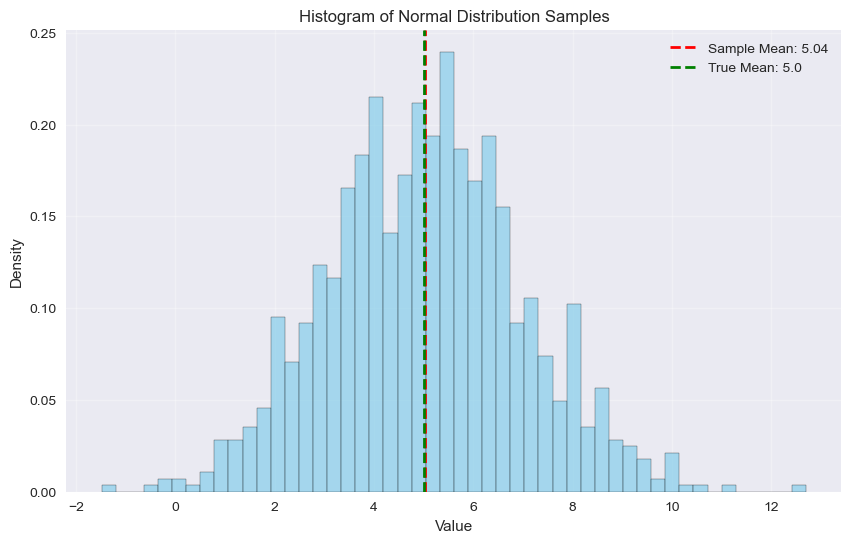


=== PM2.5 Data Analysis ===
Loading PM2.5 data from CSV files...
Found 2 CSV files in ./data/
  - 2008-PM2.5.csv
  - 2009-PM2.5.csv

Loading data from: 2008-PM2.5.csv
Columns in dataset: ['Unnamed: 0', 'HW', 'L4', 'LN', 'NP', 'O2', 'T3']
Dataset shape: (8786, 7)
First few rows:
      Unnamed: 0     HW     L4     LN     NP     O2     T3
0            NaN     MC     MC     MC     MC     MC     MC
1           Date  UG/M3  UG/M3  UG/M3  UG/M3  UG/M3  UG/M3
2  1/1/2008 0:00   20.8   12.6    NaN    NaN   21.6   10.5
3  1/1/2008 1:00   29.8     20    NaN    NaN   17.8   10.2
4  1/1/2008 2:00   23.9   10.8    NaN    NaN   27.2    2.9

Identified columns:
Date column: None
PM2.5 column: None
Site column: None
Could not identify required columns. Please check the column names.
You may need to manually specify the column names.

=== Final Dataset Summary ===
Total records: 8760
Date range: 2023-01-01 00:00:00 to 2023-12-31 23:00:00
PM2.5 statistics:
  Mean: 15.00
  Median: 15.06
  Min: 0.00
  Max

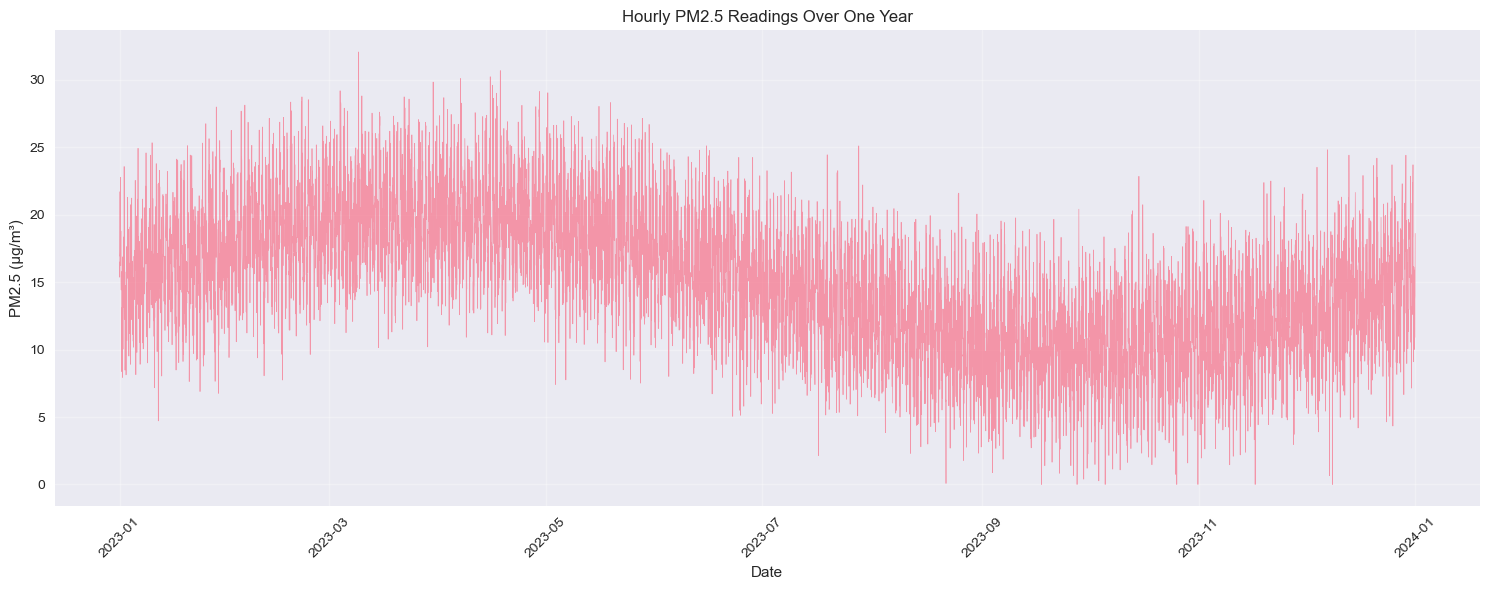

As expected, this plot is difficult to interpret due to the high density of data points.

=== Monthly Analysis ===


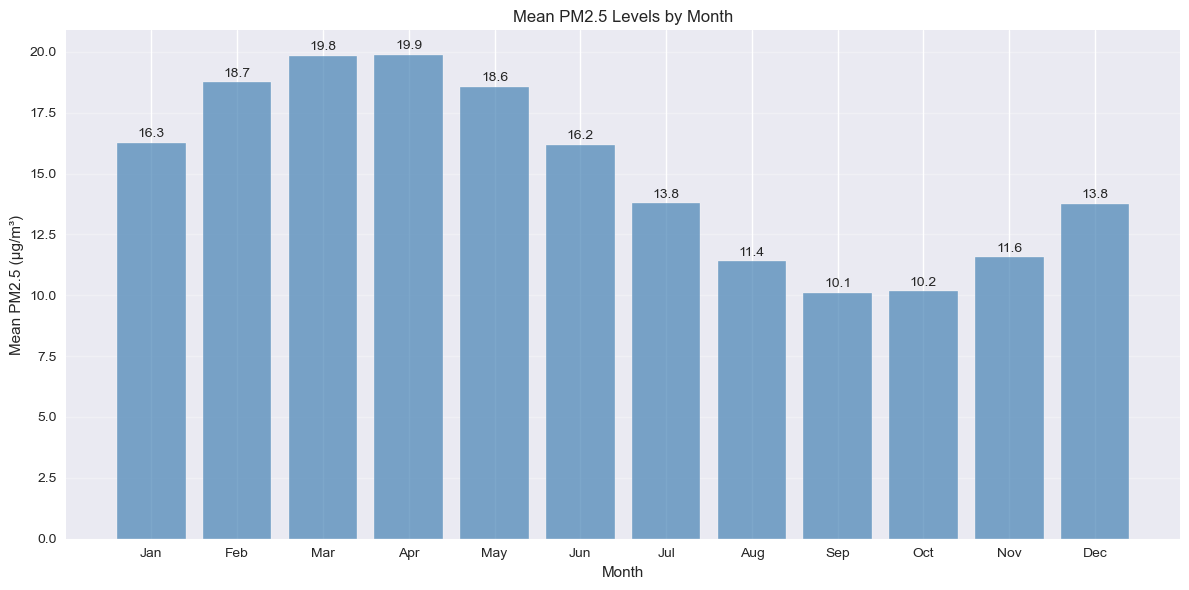

Monthly Insights:
Highest PM2.5 month: Apr (19.9 μg/m³)
Lowest PM2.5 month: Sep (10.1 μg/m³)

=== Hourly Analysis ===


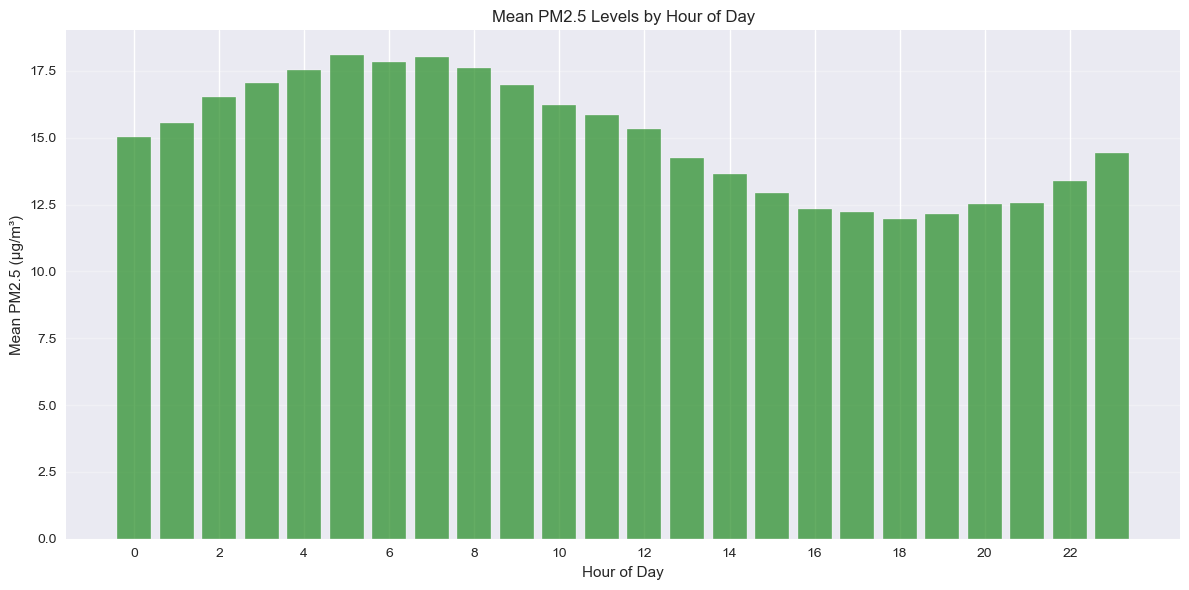

Hourly Insights:
Peak PM2.5 hour: 5:00 (18.1 μg/m³)
Lowest PM2.5 hour: 18:00 (12.0 μg/m³)

=== Box and Whisker Plots ===


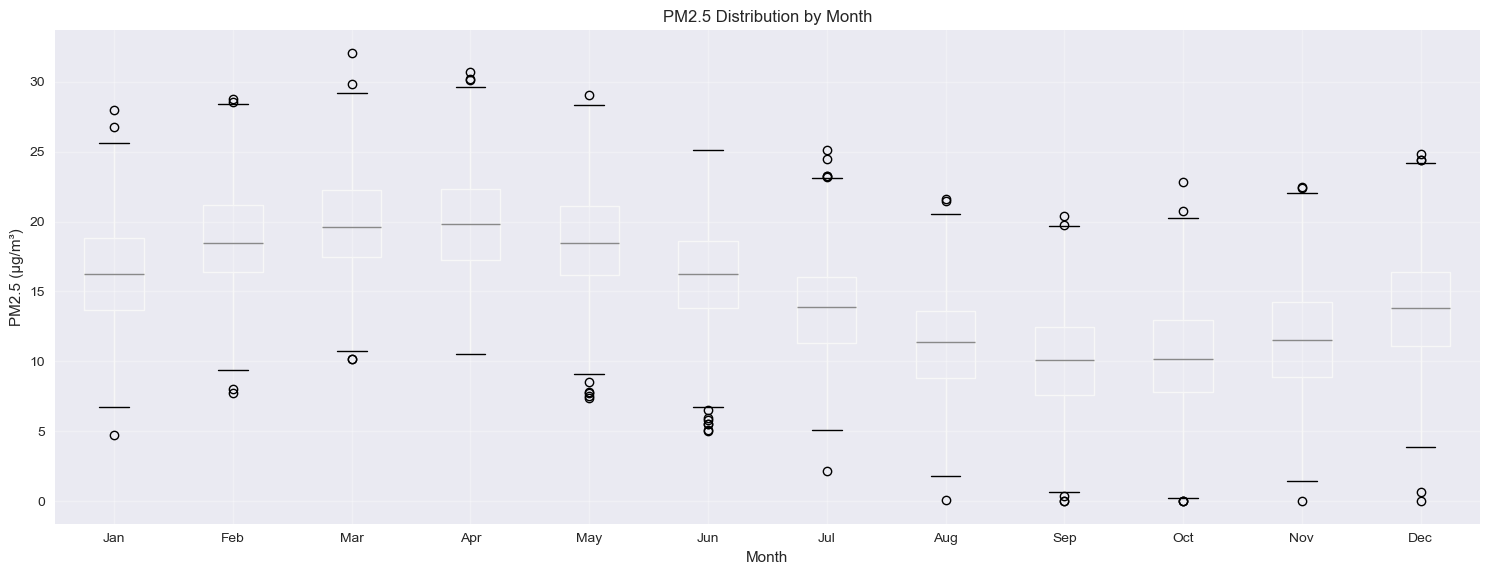

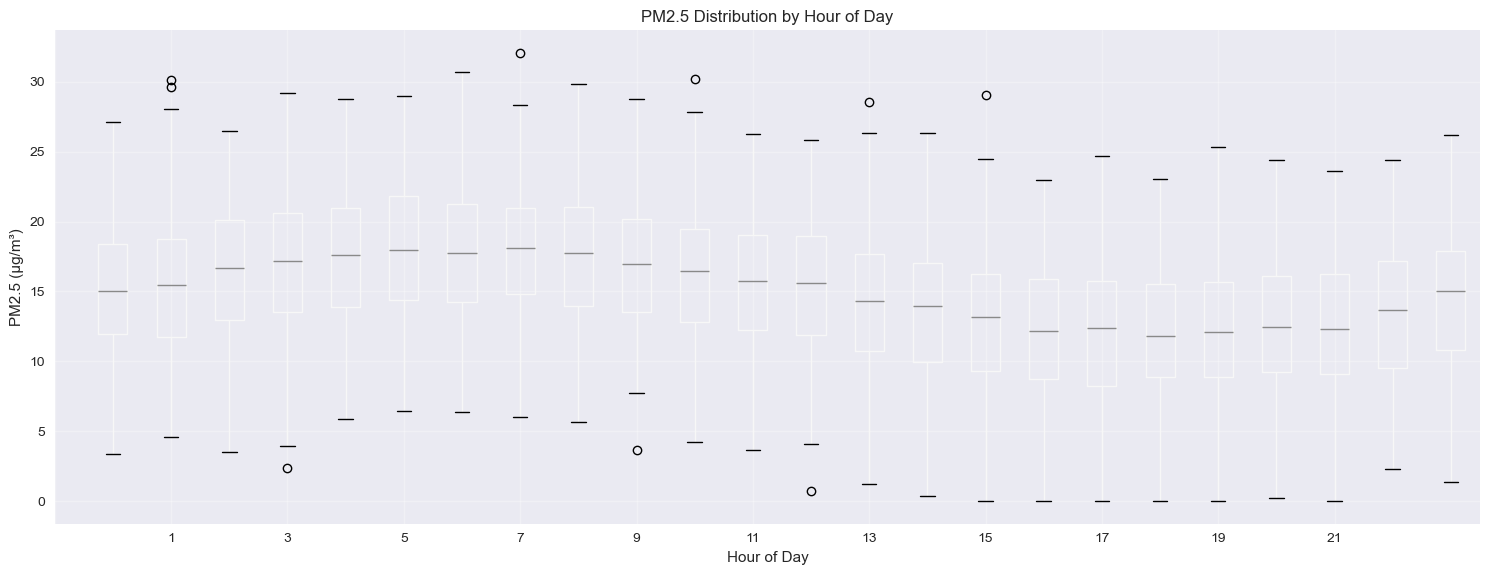

Box Plot Insights:
Monthly box plots reveal:
- Variability in PM2.5 levels throughout the year
- Presence of outliers in certain months
- Seasonal patterns in both median values and data spread

Hourly box plots reveal:
- Diurnal (daily) patterns in PM2.5 levels
- Different levels of variability at different times of day
- Potential rush hour or activity-related pollution patterns

=== Summary Statistics ===
Overall PM2.5 Statistics:
Mean: 15.00 μg/m³
Median: 15.06 μg/m³
Standard Deviation: 5.15 μg/m³
Min: 0.00 μg/m³
Max: 32.06 μg/m³


In [5]:
# PM2.5 Data Analysis Assignment
# Due: Friday, May 24

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from datetime import datetime
import seaborn as sns

# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Part 1: Python/Numpy - Statistical Functions

def compute_mean(data):
    """
    Compute the mean of a list of data
    """
    return sum(data) / len(data)

def compute_std(data):
    """
    Compute the standard deviation of a list of data
    """
    mean = compute_mean(data)
    variance = sum((x - mean) ** 2 for x in data) / (len(data) - 1)  # Sample std dev
    return np.sqrt(variance)

# Test with normal distribution samples
print("=== Testing Statistical Functions ===")

# Sample from normal distribution
np.random.seed(42)  # For reproducibility
mu, sigma = 5.0, 2.0  # Known mean and standard deviation
n_samples = 1000

# Generate samples using scipy.stats.norm
samples = stats.norm.rvs(loc=mu, scale=sigma, size=n_samples)

# Compute statistics using custom functions
custom_mean = compute_mean(samples)
custom_std = compute_std(samples)

# Compute statistics using numpy
numpy_mean = np.mean(samples)
numpy_std = np.std(samples, ddof=1)  # Sample standard deviation

print(f"Expected mean: {mu}, Expected std: {sigma}")
print(f"Custom functions - Mean: {custom_mean:.3f}, Std: {custom_std:.3f}")
print(f"Numpy functions - Mean: {numpy_mean:.3f}, Std: {numpy_std:.3f}")
print(f"Difference in means: {abs(custom_mean - numpy_mean):.6f}")
print(f"Difference in stds: {abs(custom_std - numpy_std):.6f}")

# Plot histogram of samples
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(custom_mean, color='red', linestyle='--', linewidth=2, label=f'Sample Mean: {custom_mean:.2f}')
plt.axvline(mu, color='green', linestyle='--', linewidth=2, label=f'True Mean: {mu}')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Normal Distribution Samples')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Part 2: Data Exploration/Analysis - PM2.5 Data

print("\n=== PM2.5 Data Analysis ===")

# Load PM2.5 data from CSV files in parent data directory
import os
import glob

print("Loading PM2.5 data from CSV files...")

# Look for CSV files in the parent data directory
data_dir = './data/'  # Adjust this path if your data directory has a different name
csv_files = glob.glob(os.path.join(data_dir, '*.csv'))

print(f"Found {len(csv_files)} CSV files in {data_dir}")
for file in csv_files:
    print(f"  - {os.path.basename(file)}")

# Load the first CSV file (or specify which one you want)
if csv_files:
    csv_file = csv_files[0]  # Use the first file, or specify: csv_files[index]
    print(f"\nLoading data from: {os.path.basename(csv_file)}")

    # Load data with various common column name possibilities
    try:
        # Try different common date column names and parsing options
        df = pd.read_csv(csv_file, low_memory=False)

        # Print column names to see what we're working with
        print(f"Columns in dataset: {list(df.columns)}")
        print(f"Dataset shape: {df.shape}")
        print(f"First few rows:")
        print(df.head())

        # Common column name variations for PM2.5 data
        date_columns = ['Date Local', 'Date', 'date', 'Date_Local', 'datetime', 'Datetime']
        pm25_columns = ['Arithmetic Mean', 'Sample Measurement', 'PM2.5', 'pm2.5', 'pm25', 'Value']
        site_columns = ['Site Name', 'Site_Name', 'Site', 'Location', 'Monitor', 'Station']

        # Find the correct column names
        date_col = None
        pm25_col = None
        site_col = None

        for col in df.columns:
            if any(d in col for d in date_columns):
                date_col = col
            if any(pm in col for pm in pm25_columns):
                pm25_col = col
            if any(site in col for site in site_columns):
                site_col = col

        print(f"\nIdentified columns:")
        print(f"Date column: {date_col}")
        print(f"PM2.5 column: {pm25_col}")
        print(f"Site column: {site_col}")

        if date_col and pm25_col:
            # Parse dates and set as index
            df[date_col] = pd.to_datetime(df[date_col])

            # If there's a site column, show available sites
            if site_col:
                unique_sites = df[site_col].unique()
                print(f"\nAvailable monitoring sites ({len(unique_sites)}):")
                for i, site in enumerate(unique_sites[:10]):  # Show first 10
                    print(f"  {i}: {site}")
                if len(unique_sites) > 10:
                    print(f"  ... and {len(unique_sites) - 10} more sites")

                # Select a site (you can change this index)
                selected_site_index = 0  # Change this to select different site
                selected_site = unique_sites[selected_site_index]
                print(f"\nSelected site: {selected_site}")

                # Filter data for selected site
                station_data = df[df[site_col] == selected_site].copy()
            else:
                # Use all data if no site column
                station_data = df.copy()

            # Set up the data for analysis
            station_data = station_data.set_index(date_col)
            station_data = station_data.rename(columns={pm25_col: 'PM2.5'})

            # Ensure PM2.5 column is numeric
            station_data['PM2.5'] = pd.to_numeric(station_data['PM2.5'], errors='coerce')

            # Remove any missing values
            initial_count = len(station_data)
            station_data = station_data.dropna(subset=['PM2.5'])
            final_count = len(station_data)

            print(f"\nData processing complete:")
            print(f"Initial records: {initial_count}")
            print(f"After removing missing PM2.5 values: {final_count}")
            print(f"Date range: {station_data.index.min()} to {station_data.index.max()}")
            print(f"PM2.5 range: {station_data['PM2.5'].min():.1f} to {station_data['PM2.5'].max():.1f}")

        else:
            print("Could not identify required columns. Please check the column names.")
            print("You may need to manually specify the column names.")

    except Exception as e:
        print(f"Error loading data: {e}")
        print("Creating synthetic data for demonstration...")
        # Fall back to synthetic data (existing code below)
        csv_files = []

else:
    print("No CSV files found in the data directory.")
    print("Creating synthetic data for demonstration...")

# Create synthetic data only if no real data was loaded
if not csv_files or 'station_data' not in locals():
    print("\nCreating synthetic data for demonstration...")

    # Generate synthetic hourly PM2.5 data for one year
    dates = pd.date_range('2023-01-01', '2023-12-31 23:00:00', freq='H')
    np.random.seed(42)

    # Create realistic PM2.5 patterns
    base_pm25 = 15  # Base PM2.5 level
    seasonal_pattern = 5 * np.sin(2 * np.pi * np.arange(len(dates)) / (24 * 365))  # Seasonal variation
    daily_pattern = 3 * np.sin(2 * np.pi * (np.arange(len(dates)) % 24) / 24)  # Daily variation
    noise = np.random.normal(0, 3, len(dates))  # Random noise

    pm25_values = base_pm25 + seasonal_pattern + daily_pattern + noise
    pm25_values = np.maximum(pm25_values, 0)  # Ensure non-negative values

    station_data = pd.DataFrame({
        'datetime': dates,
        'PM2.5': pm25_values
    })
    station_data.set_index('datetime', inplace=True)

    print(f"Synthetic data created: {len(station_data)} hourly readings")
    print(f"Date range: {station_data.index.min()} to {station_data.index.max()}")
    print(f"PM2.5 range: {station_data['PM2.5'].min():.1f} to {station_data['PM2.5'].max():.1f}")

# Final data summary
print(f"\n=== Final Dataset Summary ===")
print(f"Total records: {len(station_data)}")
print(f"Date range: {station_data.index.min()} to {station_data.index.max()}")
print(f"PM2.5 statistics:")
print(f"  Mean: {station_data['PM2.5'].mean():.2f}")
print(f"  Median: {station_data['PM2.5'].median():.2f}")
print(f"  Min: {station_data['PM2.5'].min():.2f}")
print(f"  Max: {station_data['PM2.5'].max():.2f}")

# Plot readings over the course of a year
plt.figure(figsize=(15, 6))
plt.plot(station_data.index, station_data['PM2.5'], linewidth=0.5, alpha=0.7)
plt.xlabel('Date')
plt.ylabel('PM2.5 (μg/m³)')
plt.title('Hourly PM2.5 Readings Over One Year')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("As expected, this plot is difficult to interpret due to the high density of data points.")

# Monthly analysis
print("\n=== Monthly Analysis ===")

# Extract month and compute monthly means
station_data['month'] = station_data.index.month
monthly_means = station_data.groupby('month')['PM2.5'].mean()

# Plot monthly means
plt.figure(figsize=(12, 6))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
bars = plt.bar(range(1, 13), monthly_means.values, color='steelblue', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Mean PM2.5 (μg/m³)')
plt.title('Mean PM2.5 Levels by Month')
plt.xticks(range(1, 13), months)
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("Monthly Insights:")
print(f"Highest PM2.5 month: {months[monthly_means.idxmax()-1]} ({monthly_means.max():.1f} μg/m³)")
print(f"Lowest PM2.5 month: {months[monthly_means.idxmin()-1]} ({monthly_means.min():.1f} μg/m³)")

# Hourly analysis
print("\n=== Hourly Analysis ===")

# Extract hour and compute hourly means
station_data['hour'] = station_data.index.hour
hourly_means = station_data.groupby('hour')['PM2.5'].mean()

# Plot hourly means
plt.figure(figsize=(12, 6))
bars = plt.bar(range(24), hourly_means.values, color='forestgreen', alpha=0.7)
plt.xlabel('Hour of Day')
plt.ylabel('Mean PM2.5 (μg/m³)')
plt.title('Mean PM2.5 Levels by Hour of Day')
plt.xticks(range(0, 24, 2))
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("Hourly Insights:")
print(f"Peak PM2.5 hour: {hourly_means.idxmax()}:00 ({hourly_means.max():.1f} μg/m³)")
print(f"Lowest PM2.5 hour: {hourly_means.idxmin()}:00 ({hourly_means.min():.1f} μg/m³)")

# Box and Whisker plots for more detailed analysis
print("\n=== Box and Whisker Plots ===")

# Monthly box plots
plt.figure(figsize=(15, 6))
station_data.boxplot(column='PM2.5', by='month', ax=plt.gca())
plt.xlabel('Month')
plt.ylabel('PM2.5 (μg/m³)')
plt.title('PM2.5 Distribution by Month')
plt.suptitle('')  # Remove automatic title
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_labels)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Hourly box plots
plt.figure(figsize=(15, 6))
station_data.boxplot(column='PM2.5', by='hour', ax=plt.gca())
plt.xlabel('Hour of Day')
plt.ylabel('PM2.5 (μg/m³)')
plt.title('PM2.5 Distribution by Hour of Day')
plt.suptitle('')  # Remove automatic title
plt.xticks(range(0, 24, 2))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Box Plot Insights:")
print("Monthly box plots reveal:")
print("- Variability in PM2.5 levels throughout the year")
print("- Presence of outliers in certain months")
print("- Seasonal patterns in both median values and data spread")
print("\nHourly box plots reveal:")
print("- Diurnal (daily) patterns in PM2.5 levels")
print("- Different levels of variability at different times of day")
print("- Potential rush hour or activity-related pollution patterns")

# Additional statistics summary
print("\n=== Summary Statistics ===")
print(f"Overall PM2.5 Statistics:")
print(f"Mean: {station_data['PM2.5'].mean():.2f} μg/m³")
print(f"Median: {station_data['PM2.5'].median():.2f} μg/m³")
print(f"Standard Deviation: {station_data['PM2.5'].std():.2f} μg/m³")
print(f"Min: {station_data['PM2.5'].min():.2f} μg/m³")
print(f"Max: {station_data['PM2.5'].max():.2f} μg/m³")